In [ ]:
from keras.datasets import cifar10

(xTrain, yTrain), (xTest, yTest) = cifar10.load_data()

In [ ]:
xTrain = xTrain.astype('float32')
xTest = xTest.astype('float32')
xTrain =  xTrain/255
xTest = xTest/255

In [ ]:
xTrain = xTrain.reshape(50000,32*32*3)
xTest = xTest.reshape(10000,32*32*3)

In [ ]:
from tensorflow.keras.utils import to_categorical
print(yTrain[0 : 5], '\n')

yTrain = to_categorical(yTrain, num_classes = 10)
yTest = to_categorical(yTest, num_classes = 10)

print(yTrain[0 : 5, :])
print(yTest[0 : 5, :])

[[6]
 [9]
 [9]
 [4]
 [1]] 

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [ ]:
print('shape of the train design matrix:\n', xTrain.shape)
print('shape of the test design matrix:\n', xTest.shape)

shape of the train design matrix:
 (50000, 3072)
shape of the test design matrix:
 (10000, 3072)


In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input

In [ ]:
inp_layer = Input(shape = (3072,))
hidden_layer1 = Dense(units = 1700, activation = 'relu')(inp_layer)
hidden_layer2 = Dense(units = 300, activation = 'relu')(hidden_layer1)
hidden_layer3 = Dense(units = 150, activation = 'relu')(hidden_layer2)
hidden_layer4 = Dense(units = 100, activation = 'relu')(hidden_layer3)
out_layer = Dense(units = 10, activation = 'softmax')(hidden_layer4)

mlp_model = Model(inputs = inp_layer, outputs = out_layer)

mlp_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 3072)]            0         
                                                                 
 dense_5 (Dense)             (None, 1700)              5224100   
                                                                 
 dense_6 (Dense)             (None, 300)               510300    
                                                                 
 dense_7 (Dense)             (None, 150)               45150     
                                                                 
 dense_8 (Dense)             (None, 100)               15100     
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 5,795,660
Trainable params: 5,795,660
Non-tra

In [ ]:
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
opt = Adam()
mlp_model.compile(optimizer = opt , loss = categorical_crossentropy , metrics = 'acc')

In [ ]:
results_1 = mlp_model.fit(xTrain, yTrain, epochs = 10,validation_data = (xTest, yTest))


Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8899 - acc: 0.3101 - val_loss: 1.7780 - val_acc: 0.3592
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6998 - acc: 0.3888 - val_loss: 1.6569 - val_acc: 0.4023
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6169 - acc: 0.4198 - val_loss: 1.5726 - val_acc: 0.4362
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5566 - acc: 0.4432 - val_loss: 1.6031 - val_acc: 0.4222
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5145 - acc: 0.4570 - val_loss: 1.5464 - val_acc: 0.4464
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4769 - acc: 0.4711 - val_loss: 1.5072 - val_acc: 0.4671
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4549 - acc: 0.4797 - val_loss: 1.4645 - val_acc: 0.4785
Epoch 8/10
1563/1563 [==============================] - 7s 4ms

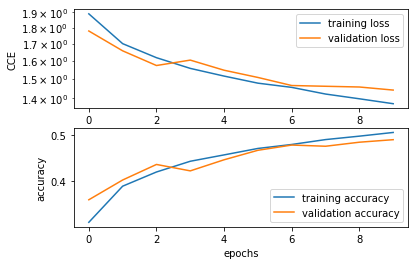

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 

train_loss = results_1.history['loss']
val_loss = results_1.history['val_loss']
train_acc = results_1.history['acc']
val_acc = results_1.history['val_acc']

plt.subplot(2, 1, 1)
plt.semilogy(train_loss)
plt.semilogy(val_loss)

plt.legend(['training loss', 'validation loss'])
plt.xlabel('epochs')
plt.ylabel('CCE')

plt.subplot(2, 1, 2)
plt.plot(train_acc)
plt.plot(val_acc)

plt.legend(['training accuracy', 'validation accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.show()

In [ ]:
y_pred_valid1 = mlp_model.predict(xTest)
print(y_pred_valid1[0:4])

[[6.8991482e-02 1.1970156e-01 2.5256163e-02 2.4993624e-01 1.1475287e-01
  1.3006838e-01 6.0728896e-02 2.4248665e-02 1.4802270e-01 5.8293115e-02]
 [8.3621636e-02 4.7058351e-02 1.4346169e-03 1.2463038e-03 8.4285520e-04
  3.9582094e-04 7.9668872e-04 1.8521703e-03 6.3759023e-01 2.2516134e-01]
 [2.8128290e-01 9.4951503e-02 3.0987497e-02 6.0915807e-03 3.3469696e-02
  1.8950260e-03 6.1146787e-04 1.2954438e-02 4.4705003e-01 9.0705819e-02]
 [4.0162823e-01 5.8687095e-02 1.5466926e-01 8.7923044e-03 8.3390914e-02
  6.7878547e-03 1.3663206e-03 1.1349999e-01 1.1479772e-01 5.6380305e-02]]


In [ ]:
print(yTest[0:5])
print(y_pred_valid1[0:5])
print(y_pred_valid1.argmax(axis=1))

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[[6.8991482e-02 1.1970156e-01 2.5256163e-02 2.4993624e-01 1.1475287e-01
  1.3006838e-01 6.0728896e-02 2.4248665e-02 1.4802270e-01 5.8293115e-02]
 [8.3621636e-02 4.7058351e-02 1.4346169e-03 1.2463038e-03 8.4285520e-04
  3.9582094e-04 7.9668872e-04 1.8521703e-03 6.3759023e-01 2.2516134e-01]
 [2.8128290e-01 9.4951503e-02 3.0987497e-02 6.0915807e-03 3.3469696e-02
  1.8950260e-03 6.1146787e-04 1.2954438e-02 4.4705003e-01 9.0705819e-02]
 [4.0162823e-01 5.8687095e-02 1.5466926e-01 8.7923044e-03 8.3390914e-02
  6.7878547e-03 1.3663206e-03 1.1349999e-01 1.1479772e-01 5.6380305e-02]
 [1.5433197e-03 2.1914251e-03 3.5832696e-02 4.7185175e-02 5.9178418e-01
  2.8739655e-02 2.8450185e-01 3.1107829e-03 4.9158940e-03 1.9493254e-04]]
[3 8 8 ... 3 2 7]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(yTest.argmax(axis=1), y_pred_valid1.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.61      0.51      0.56      1000
           1       0.55      0.66      0.60      1000
           2       0.42      0.26      0.32      1000
           3       0.35      0.40      0.37      1000
           4       0.48      0.33      0.39      1000
           5       0.45      0.29      0.35      1000
           6       0.49      0.65      0.56      1000
           7       0.45      0.65      0.53      1000
           8       0.58      0.66      0.62      1000
           9       0.51      0.51      0.51      1000

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.48     10000
weighted avg       0.49      0.49      0.48     10000



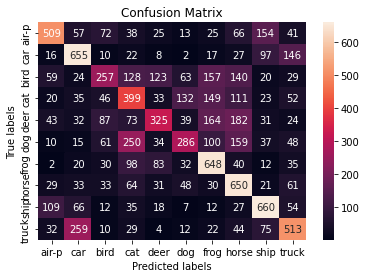

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


T10_lables = ['air-p', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']    

ax= plt.subplot()

cm = confusion_matrix(np.asarray(yTest).argmax(axis=1), np.asarray(y_pred_valid1).argmax(axis=1))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(T10_lables); ax.yaxis.set_ticklabels(T10_lables);